In [1]:
#Import dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import missingno as msno
import seaborn as sns
import numpy as np


In [2]:
# Read the CSV files that has data

train_data_df = pd.read_excel("static/data/titanic3.xls")
train_data_df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
#Get summary statistics for columns 

train_data_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
#Get null values information for columns
#Cabin>Embarked>Age has null values

train_data_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


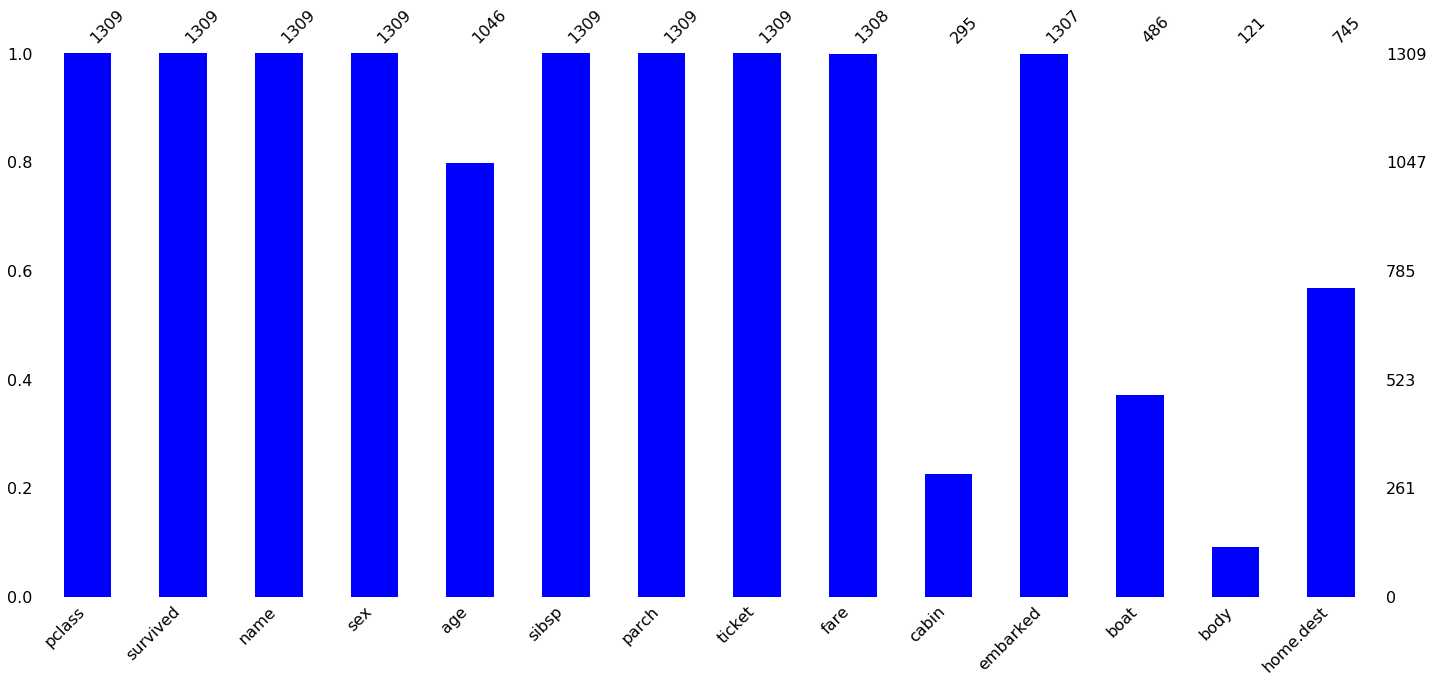

In [5]:
# Visualize Missing Values

msno.bar(train_data_df,color='b')

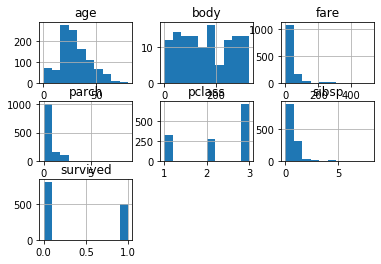

In [6]:
# Visualizing how the data is spread

train_data_df.hist()

plt.show()


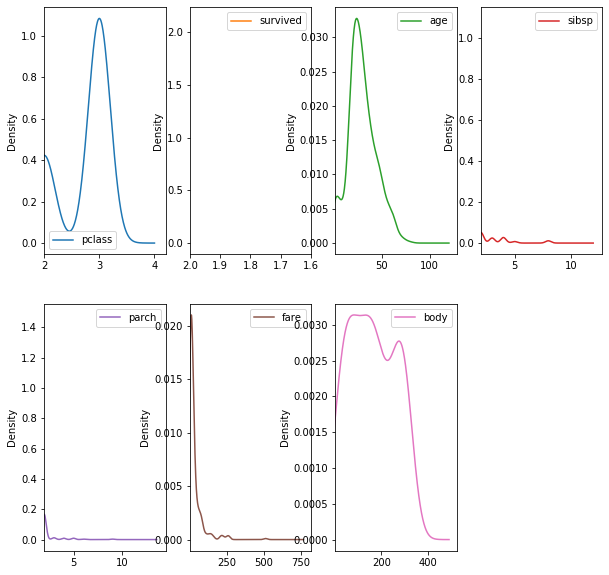

In [23]:
train_data_df.plot(kind='density', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize=(10,10))
plt.show()

# Finding the relation between survial and other features like age,sex,pclass,etc

In [8]:
# 1. Relation between pclass and survival - First class people had higher chances of survival

train_data_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [9]:
# 2. Relation between sex and survival - Females had higher chance of survival

train_data_df.groupby('sex').mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [10]:
# 3. See if there is a relation between class,sex and survival rate. 
# First class females had the greatest chance of survival.

class_sex_grouping = train_data_df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

,pclass,survived,age,sibsp,parch,fare,body
age,,,,,,,
"(0, 10]",2.651163,0.581395,4.304264,1.709302,1.406977,29.436044,4.000000
"(10, 20]",2.524691,0.395062,17.283951,0.611111,0.395062,28.807050,159.307692
"(20, 30]",2.371191,0.371191,25.324100,0.326870,0.218837,28.159013,170.393939
"(30, 40]",2.109524,0.423810,35.121429,0.361905,0.414286,42.701507,155.343750
"(40, 50]",1.787879,0.393939,45.367424,0.378788,0.409091,47.254231,151.909091
"(50, 60]",1.387097,0.483871,55.185484,0.419355,0.370968,61.943347,159.777778
"(60, 70]",1.518519,0.222222,63.537037,0.333333,0.444444,66.131250,207.875000
"(70, 80]",1.666667,0.333333,73.750000,0.166667,0.000000,34.755567,96.500000


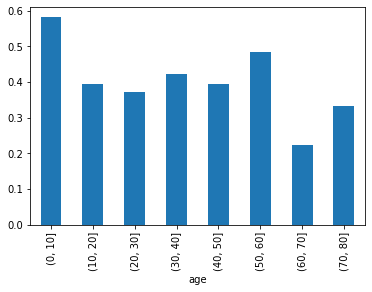

In [11]:
# 3. Relation between age and survival - Could not find any particular relation as age is an discrete column and 
#    had lot of missing values. So group ages and then find.
# Insight - Children between the age 0-10 had the highest survival rate

train_data_df.groupby('age').mean()

group_by_age = pd.cut(train_data_df["age"], np.arange(0, 90, 10))
age_grouping = train_data_df.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()
age_grouping

In [12]:
# Creating features - Feature Engineering 
# Extract the 'Title','Surname','Name' from the 'Name' Column and crate new columns for the same

newsurname = train_data_df["name"].str.split(",", n = 1, expand = True) 

newfullname = train_data_df["name"].str.split(".", n = 1, expand = True) 

train_data_df['surname'] = newsurname[0]

train_data_df['fullName'] = newfullname[1]

train_data_df['title'] = train_data_df.name.str.extract(' ([A-Za-z]+)\.', expand=False)

train_data_df.head(60)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,fullName,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,Elisabeth Walton,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,Hudson Trevor,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Helen Loraine,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,Hudson Joshua Creighton,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Hudson J C (Bessie Waldo Daniels),Mrs
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,Harry,Mr
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,Kornelia Theodosia,Miss
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews,Thomas Jr,Mr
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,Edward Dale (Charlotte Lamson),Mrs
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,Ramon,Mr


In [13]:
#Check for unique values in 'Title' column

train_data_df.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [14]:
# Get the count of 'title' column

title_group = train_data_df.groupby(train_data_df['title']).agg({'title' : ['count']})

title_group


                                                                 
                                                             

,title
,count
title,
Capt,1
Col,4
Countess,1
Don,1
Dona,1
Dr,8
Jonkheer,1
Lady,1


In [15]:
# Replacing the values in 'Title' column
# Group few 'Title' as 'Rare' - titles that are less in count

train_data_df['title'] = train_data_df['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data_df['title'] = train_data_df['title'].replace('Mlle', 'Miss')
train_data_df['title'] = train_data_df['title'].replace('Ms', 'Miss')
train_data_df['title'] = train_data_df['title'].replace('Mme', 'Mrs')


In [16]:
train_data_df.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Rare'], dtype=object)

In [17]:
# Imputing missing values for the 'Embarked' column. It has 2 missing values.
# Replace the missing values with the embarked value that has maximum count which is 'S'

emb_group = train_data_df.groupby(train_data_df['embarked']).agg({'name' : ['count']})
   
emb_group.columns = ['Passenger Boarded Count']

emb_group

,Passenger Boarded Count
embarked,
C,270
Q,123
S,914


In [18]:
# Imputing missing values for the 'Age' column
# Calculate the average age for 'male' and 'female' gender
# Replace the missing age values based on the calculated average age.

age_group = train_data_df.groupby(train_data_df['sex']).agg({'name' : ['count'],
                                                             'age' : ['mean']})
   
age_group.columns = ['Passenger Count','Average Age']

age_group

,Passenger Count,Average Age
sex,,
female,466,28.687071
male,843,30.585233


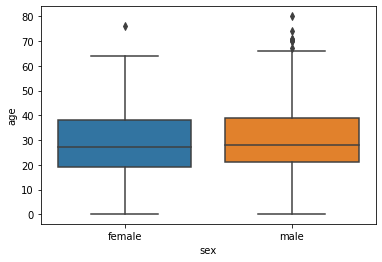

In [19]:
# The same could be seen visually using a boxplot

sns.boxplot(x = 'sex', y = 'age', data = train_data_df);


In [21]:
# Replacing null values (NaN) for 'Age','Embarked','Fare' columns to be used by the ML model

train_data_df["age"] = train_data_df["age"].fillna(28)

train_data_df["embarked"] = train_data_df["embarked"].fillna('S')

train_data_df["fare"] = train_data_df["fare"].fillna(8.05)


train_data_df




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,fullName,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,Elisabeth Walton,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,Hudson Trevor,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Helen Loraine,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,Hudson Joshua Creighton,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Hudson J C (Bessie Waldo Daniels),Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,Hileni,Miss
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour,Thamine,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,Mapriededer,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,Ortin,Mr


In [22]:
# Encoding of data for the 'Sex','Embarked','Title' column in to binary values to be used by the ML model

sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

train_data_df['sex'] = train_data_df['sex'].map(sex_mapping)
train_data_df['embarked'] = train_data_df['embarked'].map(embarked_mapping)
train_data_df['title'] = train_data_df['title'].map(title_mapping)

train_data_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,fullName,title
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,3,2,NaN,"St Louis, MO",Allen,Elisabeth Walton,2
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,3,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,Hudson Trevor,4
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,3,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Helen Loraine,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,3,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,Hudson Joshua Creighton,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,3,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Hudson J C (Bessie Waldo Daniels),3


In [23]:
#Check null values
train_data_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
surname         0
fullName        0
title           0
dtype: int64

In [24]:
#Drop unwanted columns/features not needed by the model

train_data_df_new = train_data_df.drop(['name','fare','ticket','embarked', 'cabin','surname','fullName','boat','body','home.dest'],axis=1,inplace=False)
train_data_df_new



,pclass,survived,sex,age,sibsp,parch,title
0,1,1,1,29.0000,0,0,2
1,1,1,0,0.9167,1,2,4
2,1,0,1,2.0000,1,2,2
3,1,0,0,30.0000,1,2,1
4,1,0,1,25.0000,1,2,3
...,...,...,...,...,...,...,...
1304,3,0,1,14.5000,1,0,2
1305,3,0,1,28.0000,1,0,2
1306,3,0,0,26.5000,0,0,1
1307,3,0,0,27.0000,0,0,1


In [25]:
# Assign X (data) and y (target)

X = train_data_df_new.drop("survived", axis=1)
y = train_data_df_new["survived"]
print(X.shape, y.shape)

(1309, 6) (1309,)


In [26]:
#Split data in to training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
# Scale Data

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.values.reshape(-1, 6))

In [28]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
#Create Logistic Regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [30]:
#Fit the model

classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
# Validate the model 

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7900101936799184
Testing Data Score: 0.8414634146341463


In [34]:
# Make predictions

predictions = classifier.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 1 0 1 0 0 1 1 0]
First 10 Actual labels: [0, 0, 1, 0, 1, 0, 0, 1, 1, 0]


In [35]:
#
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
323,0,0
324,1,1
325,1,1
326,0,0



Confusion Matrix results for Logistic Regression Model is: 

[[177  18]
 [ 34  99]]

Accuracy: 0.84




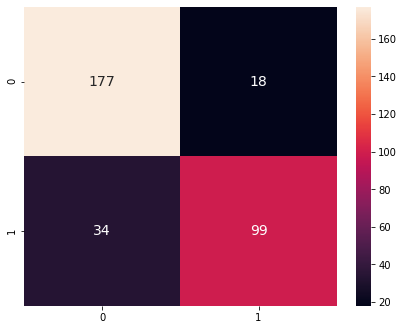

In [36]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print(f'\nConfusion Matrix results for Logistic Regression Model is: \n\n{cm}\n\nAccuracy: {round(accuracy, 2)}\n\n')
f, ax=plt.subplots(figsize=(7, 5.5))
sns.heatmap(cm, annot = True, fmt = 'd', annot_kws = {'size':14});

In [37]:
#Classification Report

from sklearn.metrics import classification_report
print(f'\n Classification Report for Logistic Regression Model \n\n\n{classification_report(y_test, predictions)}')


 Classification Report for Logistic Regression Model 


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       195
           1       0.85      0.74      0.79       133

    accuracy                           0.84       328
   macro avg       0.84      0.83      0.83       328
weighted avg       0.84      0.84      0.84       328



In [38]:
# MSE (Mean Square Error Value)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print(f"MSE: {round(MSE, 2)}")

MSE: 0.16
